In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv("C:/Users/Abhishek/Desktop/Data Analytcis/train_u6lujuX_CVtuZ9i.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

In [4]:
df['Property_Area'].value_counts()
df['Education'].value_counts()
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


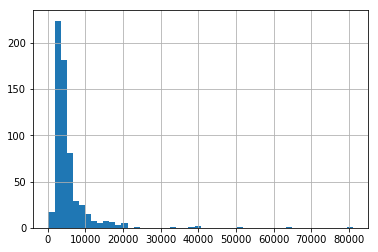

In [6]:
print(df['ApplicantIncome'].hist(bins=50))

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

AxesSubplot(0.125,0.125;0.775x0.755)


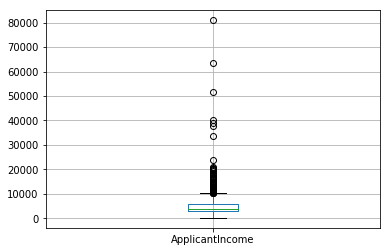

In [7]:
print(df.boxplot(column='ApplicantIncome'))

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

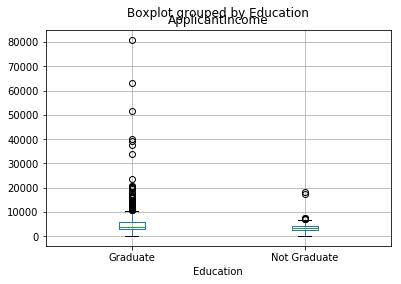

In [8]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

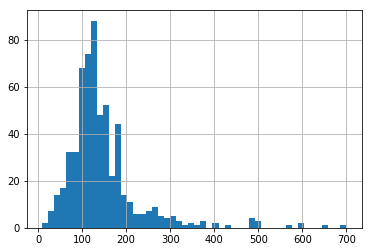

In [9]:
df['LoanAmount'].hist(bins=50)

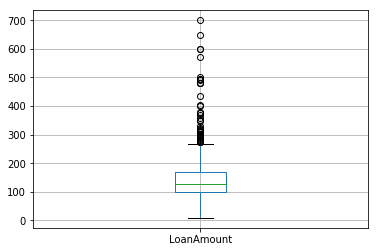

In [10]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding.

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


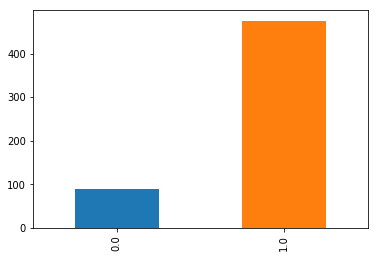

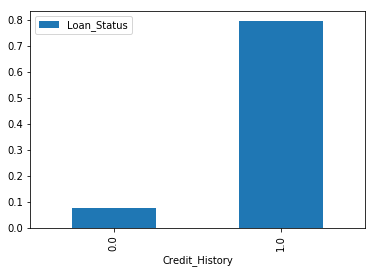

In [11]:
temp1 = df['Credit_History'].value_counts(ascending=True)
print ('Frequency Table for Credit History:') 
print (temp1)
temp1.plot(kind = 'bar')

temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('\nProbility of getting loan for each Credit History class:') 
print(temp2)
temp2.plot(kind = 'bar')

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. Similarly for Education Status:

Frequency Table for Education:
Not Graduate    134
Graduate        480
Name: Education, dtype: int64

Probility of getting loan for each Education class:
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940


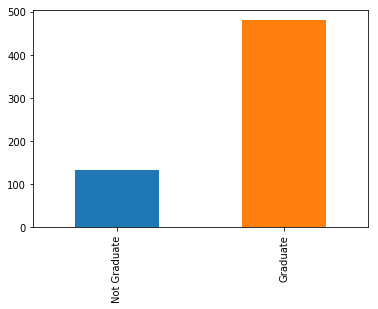

In [12]:
temp1 = df['Education'].value_counts(ascending=True)
print ('Frequency Table for Education:') 
print (temp1)
temp1.plot(kind = 'bar')

temp2 = df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'N':0,'Y':1}).mean())
print ('\nProbility of getting loan for each Education class:') 
print(temp2)
temp2.plot(kind = 'bar')

Not much of a difference in the loanstatus probability in the education criteria.

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset

In [15]:
 df.apply(lambda x: sum(x.isnull())) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data. Imputing the missing values of LoanAmount by its mean:

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)


Imputing Categorical Variables:

In [17]:
df['Credit_History'].value_counts()
df['Dependents'].value_counts()
df['Gender'].value_counts()
df['Married'].value_counts()



Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df['Credit_History'].fillna('1',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)

In [19]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.boxplot(column='LoanAmount')

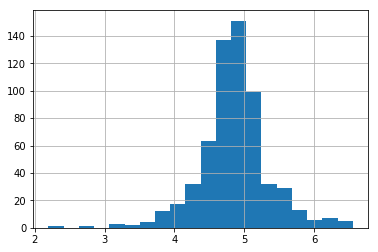

In [21]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

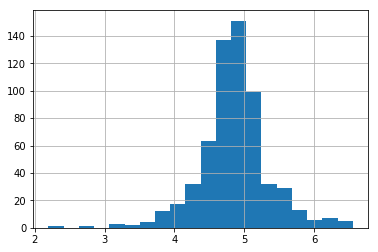

In [22]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

Predictive modeling to predict the loanstatus for test variables:

In [23]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

In [24]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

#####LOGISTIC REGRESSION#####

In [85]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

 #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

Applicants having a credit history (remember we observed this in exploration?)
Applicants with higher applicant and co-applicant incomes
Applicants with higher education level
Properties in urban areas with high growth perspectives

So let’s make our first model with ‘Credit_History’.

In [86]:
outcome_var = 'Loan_Status'
model_log = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model_log, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [118]:
model.summary()

AttributeError: 'RandomForestClassifier' object has no attribute 'summary'

In [87]:
#We can try different combination of variables:
outcome_var = 'Loan_Status'
model_log1 = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed']
classification_model(model_log1, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy is not getting impacted by less important variables. **Credit_History** is dominating the mode. We have two options now:

Better modeling techniques. Let’s explore this next.

Decision tree is another method for making a predictive model. It is known to provide higher accuracy than logistic regression model.

In [88]:
model_dt=DecisionTreeClassifier()
outcome_var=['Loan_Status']
predictor_var = ['Credit_History','Education','Married','Self_Employed']
classification_model(model_dt, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 79.804%


Here the model based on categorical variables is unable to have an impact because Credit History is dominating over them. Let’s try a few numerical variables:

In [89]:
model_dt=DecisionTreeClassifier()
outcome_var=['Loan_Status']
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model_dt, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 67.909%


Here we observed that although the accuracy went up on adding variables, the cross-validation error went down. This is the result of model over-fitting the data. Let’s try an even more sophisticated algorithm and see if it helps:

#####RANDOM FOREST#####

In [90]:
import warnings
warnings.filterwarnings("ignore") 

model_rf = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model_rf, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.991%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors
Tuning the model parameters
Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [91]:
#Create a series with feature importances:
featimp = pd.Series(model_rf.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.269706
TotalIncome_log     0.262710
LoanAmount_log      0.226997
Property_Area       0.052262
Dependents          0.051873
Loan_Amount_Term    0.044909
Married             0.024734
Gender              0.022974
Education           0.022777
Self_Employed       0.021060
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [92]:
import warnings
warnings.filterwarnings("ignore")

model_rf1 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model_rf1, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 80.299%


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.

**TEST DATA**

In [103]:
df2 = pd.read_csv("C:/Users/Abhishek/Desktop/Data Analytcis/test_Y3wMUE5_7gLdaTN.csv")
df2.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban          NaN  
1             1.0         Urban          NaN  
2             1.0         Urban          NaN  
3             NaN         Urban          NaN  
4             1.0         Urban          NaN

In [104]:
print(df2['ApplicantIncome'].hist(bins=50))
print(df2.boxplot(column='ApplicantIncome'))
df2.apply(lambda x: sum(x.isnull()),axis=0) 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Loan_Status          372
dtype: int64

In [105]:
df2['LoanAmount'].fillna(df2['LoanAmount'].mean(),inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean(),inplace=True)

In [106]:
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
df2['TotalIncome_log'] = np.log(df2['TotalIncome'])

In [107]:
df2['Credit_History'].fillna('1',inplace=True)
df2['Self_Employed'].fillna('No',inplace=True)
df2['Dependents'].fillna('0',inplace=True)
df2['Gender'].fillna('Male',inplace=True)
df2['Married'].fillna('Yes',inplace=True)

In [108]:
 df2.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          372
TotalIncome            0
TotalIncome_log        0
dtype: int64

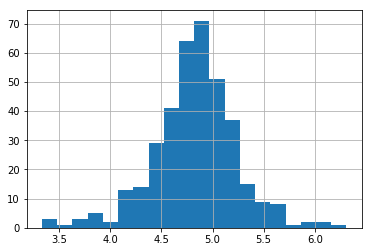

In [109]:
df2['LoanAmount_log'] = np.log(df2['LoanAmount'])
df2['LoanAmount_log'].hist(bins=20)

In [110]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])
df2.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status          float64
TotalIncome            int64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

In [111]:
df2.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   
3  LP001035       1        1           2          0              0   
4  LP001051       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

  Credit_History  Property_Area  Loan_Status  TotalIncome  TotalIncome_log  \
0              1              2          NaN         5720         8.651724   
1              1              2          NaN         4576         8.428581   
2              1              2          NaN         6800         8.824678   
3              1              2          NaN         4886         8.494129   
4              1              2          NaN         3276         8.094378   

   LoanAmount_log  
0        4.700480  
1        4.836282  
2        5.337538  
3        4.605170  
4        4.356709

**Prediction Using Best Model**

In [119]:
model_rf1 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']

In [120]:
classification_model(model_rf1, df,predictor_var,outcome_var)

Accuracy : 82.573%
Cross-Validation Score : 80.786%


In [122]:
df2['Loan_Status'] =model_rf1.predict(df2[predictor_var])

In [125]:
df2

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
5    LP001054       1        1           0          1              1   
6    LP001055       0        0           1          1              0   
7    LP001056       1        1           2          1              0   
8    LP001059       1        1           2          0              0   
9    LP001067       1        0           0          1              0   
10   LP001078       1        0           0          1              0   
11   LP001082       1        1           1          0              0   
12   LP001083       1        0           3          0              0   
13   LP001094       1        1           2          0              0   
14   LP001096       0        0           0          0              0   
15   LP001099       1        0           1          0              0   
16   LP001105       1        1           2          0              0   
17   LP001107       1        1           3          0              0   
18   LP001108       1        1           0          0              0   
19   LP001115       1        0           0          0              0   
20   LP001121       1        1           1          1              0   
21   LP001124       0        0           3          1              0   
22   LP001128       1        0           0          0              0   
23   LP001135       0        0           0          1              0   
24   LP001149       1        1           0          0              0   
25   LP001153       1        0           0          0              0   
26   LP001163       1        1           2          0              0   
27   LP001169       1        1           0          0              0   
28   LP001174       1        1           0          0              0   
29   LP001176       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
342  LP002869       1        1           3          1              0   
343  LP002870       1        1           1          0              0   
344  LP002876       1        0           0          0              0   
345  LP002878       1        1           3          0              0   
346  LP002879       1        1           0          0              0   
347  LP002885       1        0           0          1              0   
348  LP002890       1        1           2          1              0   
349  LP002891       1        1           0          0              1   
350  LP002899       1        1           2          0              0   
351  LP002901       1        0           0          0              0   
352  LP002907       1        1           0          0              0   
353  LP002920       1        1           0          0              0   
354  LP002921       1        1           3          1              0   
355  LP002932       1        1           3          0              0   
356  LP002935       1        1           1          0              0   
357  LP002952       1        0           0          0              0   
358  LP002954       1        1           2          1              0   
359  LP002962       1        0           0          0              0   
360  LP002965       0        1           0          0              0   
361  LP002969       1        1           1          0              0   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0    

In [131]:
df2['Loan_Status'] = np.where(df2.Loan_Status ==1,'Y','N')

In [134]:
df2
df2.to_csv('out1.csv')